#Importing important libraries

In [146]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [50]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

**Importing file**

In [51]:
from google.colab import files
data_to_load = files.upload()

Saving WA_Fn_UseC_Telco-Customer-Churn.csv to WA_Fn_UseC_Telco-Customer-Churn (1).csv


In [52]:
import io
Churn = pd.read_csv(io.BytesIO(data_to_load['WA_Fn_UseC_Telco-Customer-Churn.csv']))

#Data overview

In [53]:
Churn.head() 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [54]:
Churn.shape

(7043, 21)

In [57]:
Churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [55]:
#Dropping Customer ID
Churn.drop(['customerID'],inplace = True,axis = 1)

In [58]:
#Dropping the null values
Churn = Churn.dropna()
Churn.shape

(7032, 20)

In [56]:
#Converting datatype under 'TotalCharges' from object to float64 . errors = 'coerce' will avoid non-numeric data
Churn['TotalCharges'] = pd.to_numeric(Churn['TotalCharges'], errors='coerce')

In [59]:
Churn.copy = Churn.copy()

In [60]:
#Converting object to numerics
Churn['Churn'].replace(to_replace='Yes', value=1, inplace=True)
Churn['Churn'].replace(to_replace='No',  value=0, inplace=True)

Churn['gender'] = Churn['gender'].map({'Female':0,'Male':1})
Churn['Partner'] = Churn['Partner'].map({'No':0,'Yes':1})
Churn['PhoneService'] = Churn['PhoneService'].map({'No':0,'Yes':1})
Churn['Dependents'] = Churn['Dependents'].map({'No':0,'Yes':1})
Churn['PaperlessBilling'] = Churn['PaperlessBilling'].map({'No':0,'Yes':1})

In [61]:
def tenure_split(Churn):
    if Churn['tenure'] <= 12:
        return(0)
    elif (Churn['tenure'] > 12) & (Churn['tenure'] <= 24):
        return(1)
    elif (Churn['tenure'] > 24) & (Churn['tenure'] <= 36):
        return(2)
    elif (Churn['tenure'] > 36) & (Churn['tenure'] <= 48):
        return(3)
    elif (Churn['tenure'] > 48) & (Churn['tenure'] <= 60):
        return(4)
    elif Churn['tenure'] > 60:
        return(5)
    
Churn['tenure_group'] = Churn.apply(lambda Churn:tenure_split(Churn),axis=1)

In [62]:
Churn['Contract'] = Churn['Contract'].map({'Month-to-month':0,'One year':1,'Two year':2})

In [63]:
pd.set_option('display.max_columns', None)
Churn = pd.get_dummies(Churn,columns = ['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
                            'TechSupport','StreamingTV','StreamingMovies','PaymentMethod'])

In [64]:
y = Churn['Churn'].values
x = Churn.drop(columns='Churn')

#Performing basic Exploratory Data Analysis (EDA).

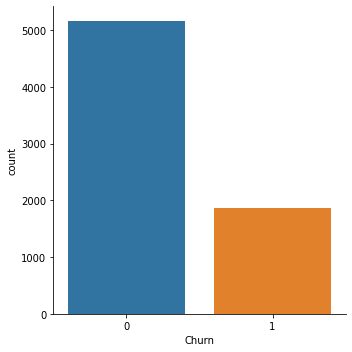

In [65]:
sns.catplot(x="Churn", kind="count", data=Churn)
plt.show()

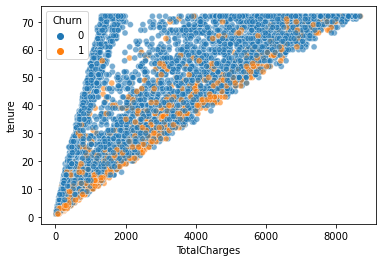

In [66]:
ax0 = sns.scatterplot(data=Churn,x='TotalCharges', y='tenure',hue='Churn', alpha=0.6)
plt.show()

In [73]:
#Transposing the data
Churn.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,7032.0,0.504693,0.500014,0.00,0.0000,1.000,1.0000,1.00
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
Partner,7032.0,0.482509,0.499729,0.00,0.0000,0.000,1.0000,1.00
Dependents,7032.0,0.298493,0.457629,0.00,0.0000,0.000,1.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
PhoneService,7032.0,0.903299,0.295571,0.00,1.0000,1.000,1.0000,1.00
Contract,7032.0,0.688567,0.832934,0.00,0.0000,0.000,1.0000,2.00
PaperlessBilling,7032.0,0.592719,0.491363,0.00,0.0000,1.000,1.0000,1.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


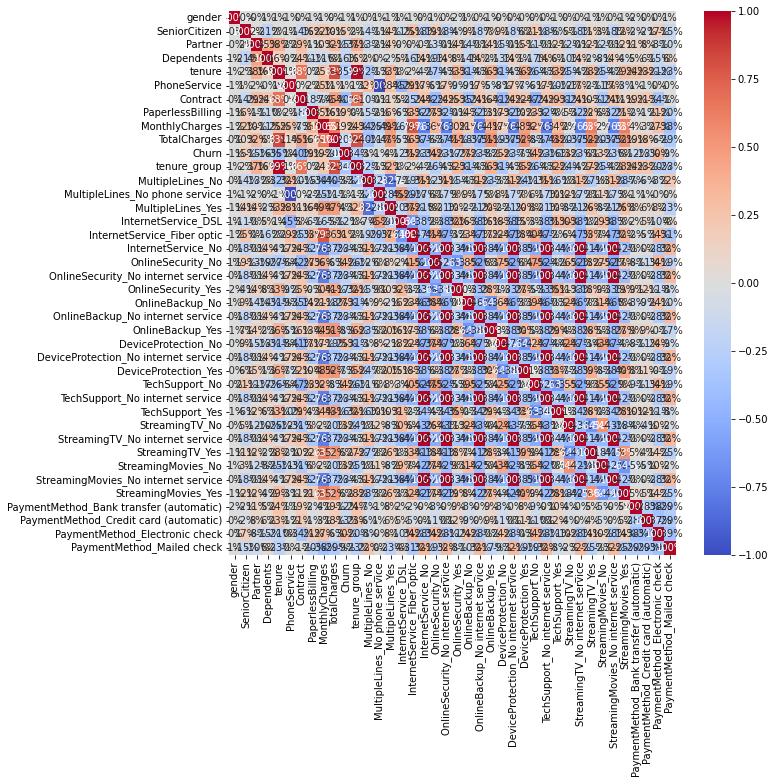

In [74]:
#Checking coorelation between variables
plt.figure(figsize=(10,10))
cor = Churn.corr()
sns.heatmap(cor,annot = True, cmap="coolwarm", fmt = '.0%' )
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


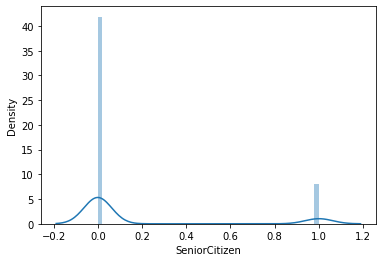

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


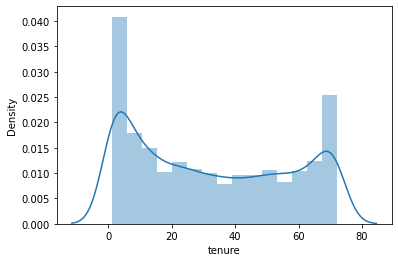

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


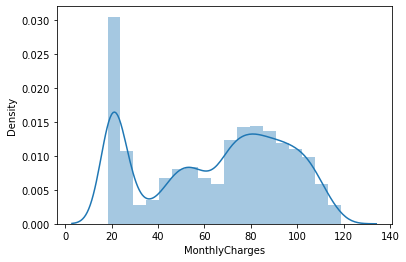

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


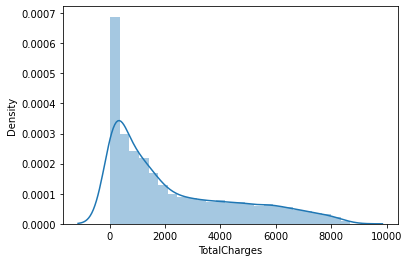

In [75]:
#checking skewness using distribution plot             
sns.distplot(Churn.SeniorCitizen)
plt.show()

sns.distplot(Churn.tenure)
plt.show()

sns.distplot(Churn.MonthlyCharges)
plt.show()

sns.distplot(Churn.TotalCharges)
plt.show()

##Handling Outliers 

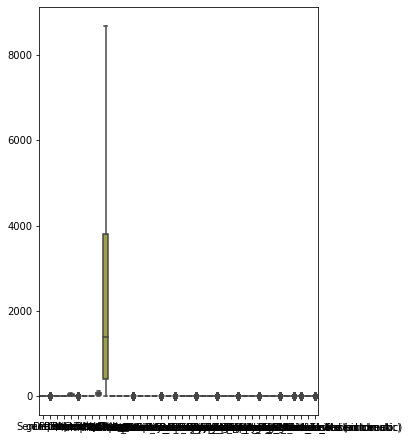

In [76]:
#Checking for outliers using boxplot. There are no outlier values 
plt.figure(figsize = (5,7.5))
sns.boxplot(data = Churn)

***Data Processing***

In [78]:
#seperating the input variables(x) and output variable(y) into 2 different datasets
dfx = Churn.drop(['Churn'],axis = 1)
dfx

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,tenure_group,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,1,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,1,0,56.95,1889.50,2,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1
2,1,0,0,0,2,1,0,1,53.85,108.15,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,1,0,42.30,1840.75,3,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0
4,0,0,0,0,2,1,0,1,70.70,151.65,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,84.80,1990.50,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1
7039,0,0,1,1,72,1,1,1,103.20,7362.90,5,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0
7040,0,0,1,1,11,0,0,1,29.60,346.45,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
7041,1,1,1,0,4,1,0,1,74.40,306.60,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1


In [77]:
dfy = Churn[['Churn']]
dfy

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [79]:
#Dummy coding to convert categorical input variables into binary values.
dfx = pd.get_dummies(dfx)
dfx.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,tenure_group,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,1,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,1,0,56.95,1889.50,2,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1
2,1,0,0,0,2,1,0,1,53.85,108.15,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,1,0,42.30,1840.75,3,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0
4,0,0,0,0,2,1,0,1,70.70,151.65,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


In [80]:
#converting the output variable into binary
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
dfy['Churn']  = LE.fit_transform(dfy['Churn'])
dfy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


#Data Normalisation

In [81]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()
dfx_normalised = pd.DataFrame(scaling.fit_transform(dfx),columns = dfx.columns)
dfx_normalised.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,tenure_group,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,1.0,0.115423,0.001275,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.464789,1.0,0.5,0.0,0.385075,0.215867,0.4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.014085,1.0,0.0,1.0,0.354229,0.010310,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.619718,0.0,0.5,0.0,0.239303,0.210241,0.6,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.014085,1.0,0.0,1.0,0.521891,0.015330,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


#Feature Selection K Best using Chisquare

In [82]:
#importing the KBest and Chisquare packages
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [86]:
#ranking the features
select_k_best_rank_features = SelectKBest(score_func = chi2, k = 5)
k_best_features = select_k_best_rank_features.fit(dfx_normalised,dfy)

Churn_k_scores = pd.DataFrame(k_best_features.scores_, columns = ['score'])
Churncolumns = pd.DataFrame(dfx_normalised.columns)

k_best_feature_rank = pd.concat([Churncolumns, Churn_k_scores], axis = 1)

k_best_feature_rank.columns = ('features', 'k_score')
print(k_best_feature_rank.nlargest(10, 'k_score'))

                                features     k_score
6                               Contract  555.879527
37        PaymentMethod_Electronic check  424.113152
17                     OnlineSecurity_No  414.036636
26                        TechSupport_No  404.010811
15           InternetService_Fiber optic  372.082851
16                    InternetService_No  285.475152
18    OnlineSecurity_No internet service  285.475152
21      OnlineBackup_No internet service  285.475152
24  DeviceProtection_No internet service  285.475152
27       TechSupport_No internet service  285.475152


#Feature Selection using Mutual Info Classifier

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Contract                           0.090734
tenure                             0.085204
tenure_group                       0.065100
OnlineSecurity_No                  0.057405
TechSupport_No                     0.055979
PaymentMethod_Electronic check     0.055439
InternetService_Fiber optic        0.050112
MonthlyCharges                     0.045716
TotalCharges                       0.043014
StreamingTV_No internet service    0.042162
dtype: float64


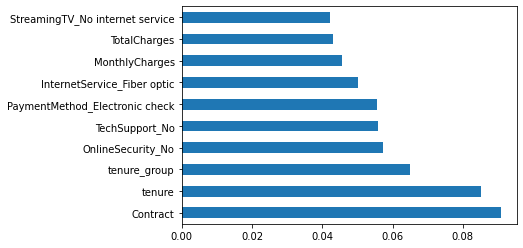

In [88]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(dfx_normalised, dfy)

mutual_data = pd.Series(mutual_info, index = dfx_normalised.columns)
mutual_data.sort_values(ascending = False)

print(mutual_data.nlargest(10))

mutual_data.nlargest(10).plot(kind = 'barh')
plt.show()

From the above 2 methods, we can see that the significant features are 'Contract','PaymentMethod_Electronic check','OnlineSecurity_No','TechSupport_No','InternetService_Fiber optic. Hence we retain these features and drop the others

In [93]:
dfx_normalised = dfx_normalised[['Contract','PaymentMethod_Electronic check','OnlineSecurity_No','TechSupport_No','InternetService_Fiber optic']]
dfx_normalised.head()

,Contract,PaymentMethod_Electronic check,OnlineSecurity_No,TechSupport_No,InternetService_Fiber optic
0,0.0,1.0,1.0,1.0,0.0
1,0.5,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.5,0.0,0.0,0.0,0.0
4,0.0,1.0,1.0,1.0,1.0


#Data Split

In [95]:
#Splitting the data into test and combined data(training + validation) in 70-30 percentage
from sklearn.model_selection import train_test_split
X_train,X_combine,Y_train,Y_combine = train_test_split(dfx_normalised,dfy,train_size=0.70, random_state=500)
X_train.shape,X_combine.shape,Y_train.shape,Y_combine.shape

((4922, 5), (2110, 5), (4922, 1), (2110, 1))

In [108]:
#splitting the combined data into test and validation data in 50-50 percentage
X_val,X_test,Y_val,Y_test = train_test_split(X_combine,Y_combine,test_size=0.50, random_state=500)
X_val.shape,X_test.shape,Y_val.shape,Y_test.shape

((703, 5), (704, 5), (703, 1), (704, 1))

#SMOTE - Oversampling Technique to overcome imbalance in the output variable

In [109]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [110]:
#importing the SMOTE package and fitting the same for the test and train data
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 10)

X_train_smote, Y_train_smote = smote.fit_resample(X_train,Y_train)

In [111]:
#checking the count of each 'label' in Y_train before SMOTE
dfy , count = np.unique(Y_train,return_counts = True)
Y_train_dict_value_count = { k:v for (k,v) in zip(dfy , count)}
Y_train_dict_value_count

{0: 4112, 1: 1513}

In [112]:
#checking the count of each 'label' in Y_train after SMOTE
df1y , count = np.unique(Y_train_smote,return_counts = True)
Y_train_smote_value_count = { k:v for (k,v) in zip(dfy , count)}
Y_train_smote_value_count

{0: 4112, 1: 4112}

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


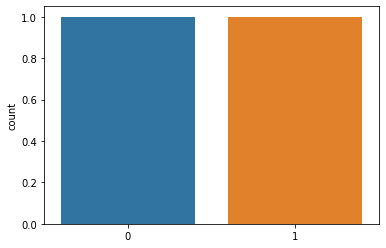

In [113]:
#checking the output class values after SMORTE
sns.countplot(dfy)
plt.show()

#Under Sampling - to reduce the number of values in the majority output class equal to the level of minority output class ( inorder to reduce imbalance)

In [114]:
from imblearn import under_sampling
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 0)
X_train_rus,Y_train_rus = rus.fit_resample(X_train,Y_train)

In [115]:
#checking the count of each 'label' in Y_train after Under Sampling
df1y , count = np.unique(Y_train_rus,return_counts = True)
Y_train_rus_value_count = { k:v for (k,v) in zip(dfy , count)}
Y_train_rus_value_count

{0: 1513, 1: 1513}

#Logistic Regression

In [117]:
#model training on training data and predicting for test data
from sklearn.linear_model import LogisticRegression
LG = LogisticRegression()
LG.fit(X_train,Y_train)
Y_pred = LG.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Model Evaluation - Using Logistic Regression**

In [118]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,roc_auc_score,log_loss
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[469  64]
 [ 78  93]]


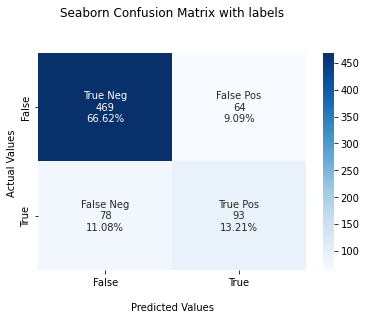

In [120]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [121]:
ac = accuracy_score(Y_test,Y_pred)
print('accuracy score', ac)

rc = recall_score(Y_test,Y_pred)
print('recall score', rc)

pc = precision_score(Y_test,Y_pred)
print('precision score', pc)

f1sc = f1_score(Y_test,Y_pred)
print('f1 score', f1sc)

roc = roc_auc_score (Y_test,Y_pred)
print ('roc_auc_score', roc)

log_ls = log_loss(Y_test, Y_pred)
print ('log_loss',log_ls)

accuracy score 0.7982954545454546
recall score 0.543859649122807
precision score 0.5923566878980892
f1 score 0.5670731707317073
roc_auc_score 0.7118923011092458
log_loss 6.966700883967116


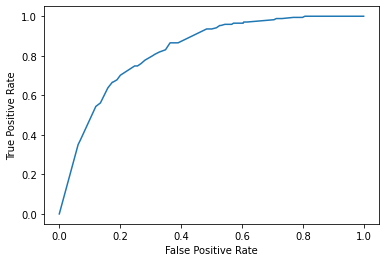

In [122]:
#drawing the roc_auc curve
#define metrics
from sklearn import metrics
y_pred_proba = LG.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Checking if the evaluation parameter scores can be bettered if imbalance of output values is cancelled using Undersampling method.

In [124]:
LG.fit(X_train_rus,Y_train_rus)
Y_pred = LG.predict(X_test)


#print confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

ac = accuracy_score(Y_test,Y_pred)
print('accuracy score', ac)

rc = recall_score(Y_test,Y_pred)
print('recall score', rc)

pc = precision_score(Y_test,Y_pred)
print('precision score', pc)

f1sc = f1_score(Y_test,Y_pred)
print('f1 score', f1sc)

roc = roc_auc_score (Y_test,Y_pred)
print ('roc_auc_score', roc)

log_ls = log_loss(Y_test, Y_pred)
print ('log_loss',log_ls)


[[387 146]
 [ 40 131]]
accuracy score 0.7357954545454546
recall score 0.7660818713450293
precision score 0.4729241877256318
f1 score 0.5848214285714285
roc_auc_score 0.7460803352972801
log_loss 9.125467543576981


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Checking if the evaluation parameter scores can be bettered if imbalance of output values is cancelled using Oversampling method (SMOTE)

In [123]:
LG.fit(X_train_smote,Y_train_smote)
Y_pred = LG.predict(X_test)


#print confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

ac = accuracy_score(Y_test,Y_pred)
print('accuracy score', ac)

rc = recall_score(Y_test,Y_pred)
print('recall score', rc)

pc = precision_score(Y_test,Y_pred)
print('precision score', pc)

f1sc = f1_score(Y_test,Y_pred)
print('f1 score', f1sc)

roc = roc_auc_score (Y_test,Y_pred)
print ('roc_auc_score', roc)

log_ls = log_loss(Y_test, Y_pred)
print ('log_loss',log_ls)

[[383 150]
 [ 38 133]]
accuracy score 0.7329545454545454
recall score 0.7777777777777778
precision score 0.46996466431095407
f1 score 0.5859030837004405
roc_auc_score 0.7481759432978945
log_loss 9.223593610593376


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#Decision Tree

In [126]:
#Model training on training dataset and predicting for test data
dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
dtc.fit(X_train,Y_train)
Y_pred = dtc.predict(X_test)

***Evaluating Model***

In [127]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,roc_auc_score,log_loss

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[461  72]
 [ 73  98]]


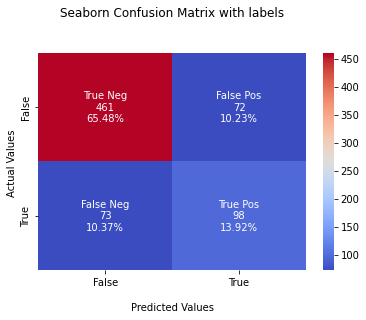

In [128]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='coolwarm')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [129]:
ac = accuracy_score(Y_test,Y_pred)
print('accuracy score', ac)

rc = recall_score(Y_test,Y_pred)
print('recall score', rc)

pc = precision_score(Y_test,Y_pred)
print('precision score', pc)

f1sc = f1_score(Y_test,Y_pred)
print('f1 score', f1sc)

roc = roc_auc_score (Y_test,Y_pred)
print ('roc_auc_score', roc)

log_ls = log_loss(Y_test, Y_pred)
print ('log_loss', log_ls)

accuracy score 0.7940340909090909
recall score 0.5730994152046783
precision score 0.5764705882352941
f1 score 0.5747800586510263
roc_auc_score 0.7190074937186618
log_loss 7.113892256075317


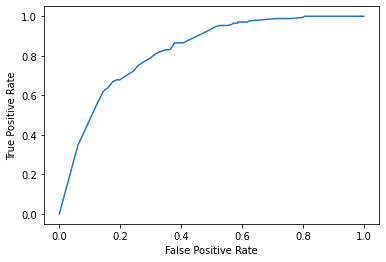

In [130]:
#drawing the roc_auc curve
#define metrics
from sklearn import metrics
y_pred_proba = LG.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Checking if the evaluation parameter scores can be fixed if imbalance of output values is cancelled using Oversampling method (SMOTE)



In [131]:
dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
dtc.fit(X_train_smote,Y_train_smote)
Y_pred = dtc.predict(X_test)

#print confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

ac = accuracy_score(Y_test,Y_pred)
print('accuracy score', ac)

rc = recall_score(Y_test,Y_pred)
print('recall score', rc)

pc = precision_score(Y_test,Y_pred)
print('precision score', pc)

f1sc = f1_score(Y_test,Y_pred)
print('f1 score', f1sc)

roc = roc_auc_score (Y_test,Y_pred)
print ('roc_auc_score', roc)

log_ls = log_loss(Y_test, Y_pred)
print ('log_loss',log_ls)

[[380 153]
 [ 36 135]]
accuracy score 0.7315340909090909
recall score 0.7894736842105263
precision score 0.46875
f1 score 0.5882352941176471
roc_auc_score 0.7512096376024489
log_loss 9.272657779893379


Checking if the evaluation parameter scores can be fixed if imbalance of output values is cancelled using Undersampling method.

In [132]:
dtc.fit(X_train_rus,Y_train_rus)
Y_pred = dtc.predict(X_test)


#print confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

ac = accuracy_score(Y_test,Y_pred)
print('accuracy score', ac)

rc = recall_score(Y_test,Y_pred)
print('recall score', rc)

pc = precision_score(Y_test,Y_pred)
print('precision score', pc)

f1sc = f1_score(Y_test,Y_pred)
print('f1 score', f1sc)

roc = roc_auc_score (Y_test,Y_pred)
print ('roc_auc_score', roc)

log_ls = log_loss(Y_test, Y_pred)
print ('log_loss',log_ls)


[[380 153]
 [ 36 135]]
accuracy score 0.7315340909090909
recall score 0.7894736842105263
precision score 0.46875
f1 score 0.5882352941176471
roc_auc_score 0.7512096376024489
log_loss 9.272657779893379


#Random Forest

In [133]:
#model training on training data and predicting for test data
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 20, criterion = 'gini' , random_state = 0)
rfc.fit(X_train , Y_train)
Y_pred = rfc.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


**Evaluating Model**

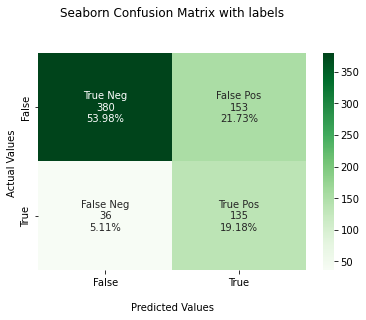

In [134]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Greens')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [135]:
ac = accuracy_score(Y_test,Y_pred)
print('accuracy score', ac)

rc = recall_score(Y_test,Y_pred)
print('recall score', rc)

pc = precision_score(Y_test,Y_pred)
print('precision score', pc)

f1sc = f1_score(Y_test,Y_pred)
print('f1 score', f1sc)

roc = roc_auc_score (Y_test,Y_pred)
print ('roc_auc_score', roc)

log_ls = log_loss(Y_test, Y_pred)
print ('log_ls', log_ls)

accuracy score 0.7954545454545454
recall score 0.3508771929824561
precision score 0.6451612903225806
f1 score 0.45454545454545453
roc_auc_score 0.6444817484612093
log_ls 7.064787198270363


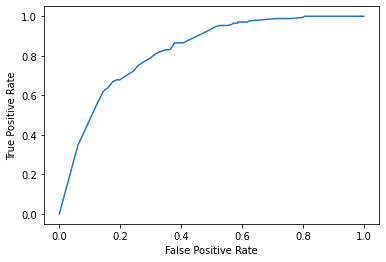

In [136]:
#drawing the roc_auc curve
#define metrics
from sklearn import metrics
y_pred_proba = LG.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Checking if the evaluation parameter scores can be fixed if imbalance of output values is cancelled using Oversampling method (SMOTE)

In [137]:
rfc = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
rfc.fit(X_train_smote,Y_train_smote)
Y_pred = rfc.predict(X_test)

#print confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

ac = accuracy_score(Y_test,Y_pred)
print('accuracy score', ac)

rc = recall_score(Y_test,Y_pred)
print('recall score', rc)

pc = precision_score(Y_test,Y_pred)
print('precision score', pc)

f1sc = f1_score(Y_test,Y_pred)
print('f1 score', f1sc)

roc = roc_auc_score (Y_test,Y_pred)
print ('roc_auc_score', roc)

log_ls = log_loss(Y_test, Y_pred)
print ('log_loss',log_ls)

[[380 153]
 [ 36 135]]
accuracy score 0.7315340909090909
recall score 0.7894736842105263
precision score 0.46875
f1 score 0.5882352941176471
roc_auc_score 0.7512096376024489
log_loss 9.272657779893379


Checking if the evaluation parameter scores can be fixed if imbalance of output values is cancelled using Oversampling method (SMOTE)

In [138]:
rfc = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
rfc.fit(X_train_rus,Y_train_rus)
Y_pred = rfc.predict(X_test)

#print confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

ac = accuracy_score(Y_test,Y_pred)
print('accuracy score', ac)

rc = recall_score(Y_test,Y_pred)
print('recall score', rc)

pc = precision_score(Y_test,Y_pred)
print('precision score', pc)

f1sc = f1_score(Y_test,Y_pred)
print('f1 score', f1sc)

roc = roc_auc_score (Y_test,Y_pred)
print ('roc_auc_score', roc)

log_ls = log_loss(Y_test, Y_pred)
print ('log_loss',log_ls)


[[380 153]
 [ 36 135]]
accuracy score 0.7315340909090909
recall score 0.7894736842105263
precision score 0.46875
f1 score 0.5882352941176471
roc_auc_score 0.7512096376024489
log_loss 9.272657779893379


#K Nearest Neighbours

In [139]:
#model training on training data and predicting for test data
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train , Y_train)
Y_pred = knn.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


**Evaluating Model**

In [140]:
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[459  74]
 [121  50]]


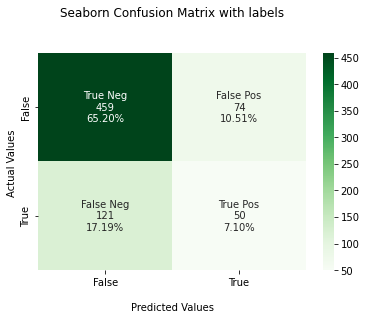

In [141]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Greens')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [142]:
ac = accuracy_score(Y_test,Y_pred)
print('accuracy score', ac)

rc = recall_score(Y_test,Y_pred)
print('recall score', rc)

pc = precision_score(Y_test,Y_pred)
print('precision score', pc)

f1sc = f1_score(Y_test,Y_pred)
print('f1 score', f1sc)

roc = roc_auc_score (Y_test,Y_pred)
print ('roc_auc_score', roc)

log_ls = log_loss(Y_test, Y_pred)
print ('log_ls', log_ls)

accuracy score 0.7230113636363636
recall score 0.29239766081871343
precision score 0.4032258064516129
f1 score 0.3389830508474576
roc_auc_score 0.5767804439177995
log_ls 9.566932623888379


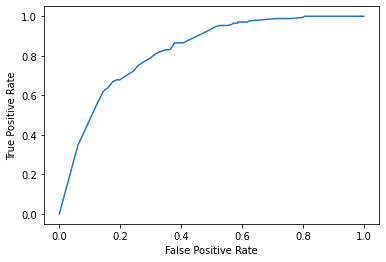

In [143]:
#re-drawing the roc_auc curve
#define metrics
from sklearn import metrics
y_pred_proba = LG.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Checking if the evaluation parameter scores can be fixed if imbalance of output values is cancelled using Oversampling method (SMOTE)


In [144]:
knn.fit(X_train_smote , Y_train_smote)
Y_pred = knn.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

ac = accuracy_score(Y_test,Y_pred)
print('accuracy score', ac)

rc = recall_score(Y_test,Y_pred)
print('recall score', rc)

pc = precision_score(Y_test,Y_pred)
print('precision score', pc)

f1sc = f1_score(Y_test,Y_pred)
print('f1 score', f1sc)

roc = roc_auc_score (Y_test,Y_pred)
print ('roc_auc_score', roc)

log_ls = log_loss(Y_test, Y_pred)
print ('log_loss',log_ls)


[[426 107]
 [ 61 110]]
accuracy score 0.7613636363636364
recall score 0.6432748538011696
precision score 0.5069124423963134
f1 score 0.5670103092783505
roc_auc_score 0.7212621923790089
log_loss 8.242329533054013


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Checking if the evaluation parameter scores can be fixed if imbalance of output values is cancelled using Undersampling method.


In [145]:
knn.fit(X_train_rus, Y_train_rus)
Y_pred = knn.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

ac = accuracy_score(Y_test,Y_pred)
print('accuracy score', ac)

rc = recall_score(Y_test,Y_pred)
print('recall score', rc)

pc = precision_score(Y_test,Y_pred)
print('precision score', pc)

f1sc = f1_score(Y_test,Y_pred)
print('f1 score', f1sc)

roc = roc_auc_score (Y_test,Y_pred)
print ('roc_auc_score', roc)

log_ls = log_loss(Y_test, Y_pred)
print ('log_loss',log_ls)

[[532   1]
 [170   1]]
accuracy score 0.7571022727272727
recall score 0.005847953216374269
precision score 0.5
f1 score 0.011560693641618498
roc_auc_score 0.5019858903042471
log_loss 8.38939142489653


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


#XGB Classifier

In [147]:
#Importing the classifier, setting the parameters and printing the best parameters
from xgboost import XGBClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
model=XGBClassifier()
grid = {'gamma':[2],'reg_lambda':[4],'eta':[.01,.03,.04,.05]}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
grid_result = grid_search.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.773869 using {'eta': 0.01, 'gamma': 2, 'reg_lambda': 4}


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [148]:
#Parameter Selection
from xgboost import XGBClassifier
XGBc = XGBClassifier(eta=0.01,gamma=2,reg_lambda=4)# Parameter Selected 
XGBc.fit(X_train,Y_train)
y_pred=XGBc.predict(X_test)

**Evaluating Model**

In [149]:
#Printing the Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[532   1]
 [170   1]]


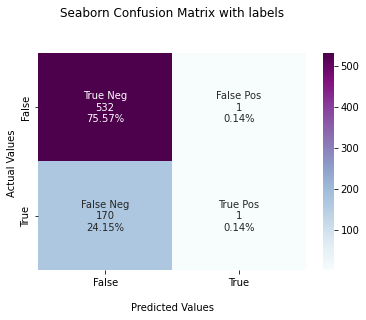

In [150]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='BuPu')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [151]:
ac = accuracy_score(Y_test,Y_pred)
print('accuracy score', ac)

rc = recall_score(Y_test,Y_pred)
print('recall score', rc)

pc = precision_score(Y_test,Y_pred)
print('precision score', pc)

f1sc = f1_score(Y_test,Y_pred)
print('f1 score', f1sc)

roc = roc_auc_score (Y_test,Y_pred)
print ('roc_auc_score', roc)

log_ls = log_loss(Y_test, Y_pred)
print ('log_loss', log_ls)

accuracy score 0.7571022727272727
recall score 0.005847953216374269
precision score 0.5
f1 score 0.011560693641618498
roc_auc_score 0.5019858903042471
log_loss 8.38939142489653


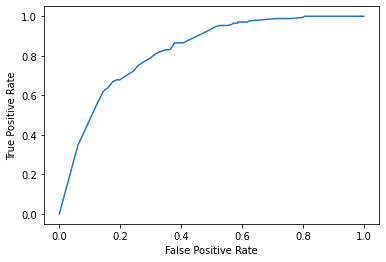

In [152]:
#re-drawing the roc_auc curve
#define metrics
from sklearn import metrics
y_pred_proba = LG.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Checking if the evaluation parameter scores can be fixed if imbalance of output values is cancelled using Oversampling method (SMOTE)


In [ ]:
XGBc.fit(X_train_smote , Y_train_smote)
Y_pred = XGBc.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

ac = accuracy_score(Y_test,Y_pred)
print('accuracy score', ac)

rc = recall_score(Y_test,Y_pred)
print('recall score', rc)

pc = precision_score(Y_test,Y_pred)
print('precision score', pc)

f1sc = f1_score(Y_test,Y_pred)
print('f1 score', f1sc)

roc = roc_auc_score (Y_test,Y_pred)
print ('roc_auc_score', roc)

log_ls = log_loss(Y_test, Y_pred)
print ('log_loss',log_ls)

Checking if the evaluation parameter scores can be fixed if imbalance of output values is cancelled using Undersampling method.


In [154]:
XGBc.fit(X_train_rus , Y_train_rus)
Y_pred = XGBc.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

ac = accuracy_score(Y_test,Y_pred)
print('accuracy score', ac)

rc = recall_score(Y_test,Y_pred)
print('recall score', rc)

pc = precision_score(Y_test,Y_pred)
print('precision score', pc)

f1sc = f1_score(Y_test,Y_pred)
print('f1 score', f1sc)

roc = roc_auc_score (Y_test,Y_pred)
print ('roc_auc_score', roc)

log_ls = log_loss(Y_test, Y_pred)
print ('log_loss',log_ls)

[[372 161]
 [ 35 136]]
accuracy score 0.7215909090909091
recall score 0.7953216374269005
precision score 0.45791245791245794
f1 score 0.5811965811965811
roc_auc_score 0.7466289237791163
log_loss 9.616092199699937


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#Support Vector Classifier

In [155]:
svcm = SVC()
svcm.fit(X_train , Y_train)
Y_pred = svcm.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


***Support Vector Classifier***

In [156]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score, roc_auc_score,log_loss
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[473  60]
 [ 82  89]]


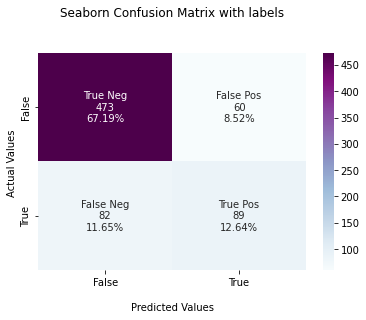

In [157]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='BuPu')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [158]:
ac = accuracy_score(Y_test,Y_pred)
print('accuracy score', ac)

rc = recall_score(Y_test,Y_pred)
print('recall score', rc)

pc = precision_score(Y_test,Y_pred)
print('precision score', pc)

f1sc = f1_score(Y_test,Y_pred)
print('f1 score', f1sc)

roc = roc_auc_score (Y_test,Y_pred)
print ('roc_auc_score', roc)

log_ls = log_loss(Y_test, Y_pred)
print ('log_loss', log_ls)

accuracy score 0.7982954545454546
recall score 0.52046783625731
precision score 0.5973154362416108
f1 score 0.55625
roc_auc_score 0.7039487398922574
log_loss 6.966696340799899


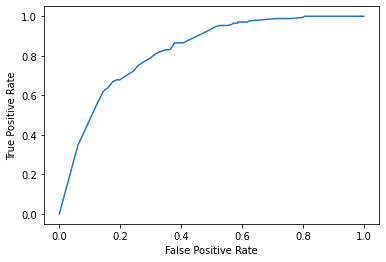

In [159]:
#drawing the roc_auc curve
#define metrics
from sklearn import metrics
y_pred_proba = LG.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [160]:
#getting model parametes
svcm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

***Grid Search - Support Vector Classifier***



In [161]:
param_grid = {'C' :[0.1,1,10,100,1000], 'gamma' :[0.1,0.01,0.001,0.0001], 'kernel':['rbf']}

In [162]:
#cross-validation
from sklearn.model_selection import GridSearchCV

In [164]:
#Creating an estimator like SVC and creates a new estimator that behaves exactly the same 
grid = GridSearchCV(SVC(),param_grid,refit = True,verbose = 5)

In [166]:
#fitting the grid into the training dataset
grid.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.770 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.788 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.769 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.775 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.770 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.731 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.731 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.731 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.732 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.732 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.731 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.731 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.731 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.732 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.732 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.731 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.731 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.731 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.732 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.732 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.772 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.780 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.769 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.771 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.770 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.772 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.731 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.780 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.732 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.772 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.731 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.731 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.731 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.732 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.732 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.731 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.731 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.731 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.732 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.732 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.772 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.788 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.780 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.775 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.772 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.762 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.779 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.757 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.768 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.764 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.772 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.731 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.780 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.732 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.772 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.731 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.731 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.731 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.732 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.732 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.772 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.788 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.780 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.781 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.770 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.772 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.780 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.769 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.771 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.772 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.760 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.779 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.759 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.774 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.762 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.772 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.731 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.780 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.732 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.772 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.772 total time=   1.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.788 total time=   1.8s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.781 total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.781 total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.770 total time=   2.6s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.772 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.788 total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.780 total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.775 total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.772 total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.764 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.786 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.757 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.779 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.764 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.753 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.781 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.759 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.778 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.762 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=5)

Inspecting the best parameters found by GridSearchCV in the best_params_attribute and the best estimator in best_estimator_attribute

In [167]:
grid.best_params_

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

In [168]:
grid.best_estimator_

SVC(C=1000, gamma=0.1)

In [169]:
#Re-run predictions on this grid object 
grid_predictions = grid.predict(X_test)

In [170]:
# rerunning the confusion matrix
print(confusion_matrix(Y_test,grid_predictions))

[[473  60]
 [ 82  89]]


In [171]:
# recalculating the evaluation parameters
ac = accuracy_score(Y_test,grid_predictions)
print('accuracy score', ac)

rc = recall_score(Y_test,grid_predictions)
print('recall score', rc)

pc = precision_score(Y_test,grid_predictions)
print('precision score', pc)

f1sc = f1_score(Y_test,grid_predictions)
print('f1 score', f1sc)

roc = roc_auc_score (Y_test,grid_predictions)
print ('roc_auc_score', roc)

log_ls = log_loss(Y_test, Y_pred)
print ('log_loss', log_ls)

accuracy score 0.7982954545454546
recall score 0.52046783625731
precision score 0.5973154362416108
f1 score 0.55625
roc_auc_score 0.7039487398922574
log_loss 6.966696340799899


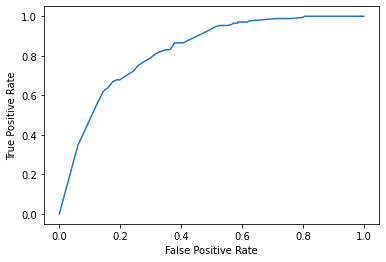

In [172]:
#re-drawing the roc_auc curve
#define metrics
from sklearn import metrics
y_pred_proba = LG.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Checking if the evaluation parameter scores can be fixed if imbalance of output values is cancelled using Oversampling method (SMOTE)


In [173]:
svcm.fit(X_train_smote, Y_train_smote)
Y_pred = svcm.predict(X_test)

#print confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

ac = accuracy_score(Y_test,Y_pred)
print('accuracy score', ac)

rc = recall_score(Y_test,Y_pred)
print('recall score', rc)

pc = precision_score(Y_test,Y_pred)
print('precision score', pc)

f1sc = f1_score(Y_test,Y_pred)
print('f1 score', f1sc)

roc = roc_auc_score (Y_test,Y_pred)
print ('roc_auc_score', roc)

log_ls = log_loss(Y_test, Y_pred)
print ('log_loss',log_ls)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[392 141]
 [ 42 129]]
accuracy score 0.7400568181818182
recall score 0.7543859649122807
precision score 0.4777777777777778
f1 score 0.5850340136054423
roc_auc_score 0.7449228136006056
log_loss 8.978279578844194


Checking if the evaluation parameter scores can be fixed if imbalance of output values is cancelled using Undersampling method.


In [174]:
svcm.fit(X_train_rus, Y_train_rus)
Y_pred = svcm.predict(X_test)

#print confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

ac = accuracy_score(Y_test,Y_pred)
print('accuracy score', ac)

rc = recall_score(Y_test,Y_pred)
print('recall score', rc)

pc = precision_score(Y_test,Y_pred)
print('precision score', pc)

f1sc = f1_score(Y_test,Y_pred)
print('f1 score', f1sc)

roc = roc_auc_score (Y_test,Y_pred)
print ('roc_auc_score', roc)

log_ls = log_loss(Y_test, Y_pred)
print ('log_loss',log_ls)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[374 159]
 [ 35 136]]
accuracy score 0.7244318181818182
recall score 0.7953216374269005
precision score 0.4610169491525424
f1 score 0.5836909871244634
roc_auc_score 0.7485050963869962
log_loss 9.51796840426715
